In [ ]:
# Implementation

In [4]:
# Import all modules

import os
import theano
import random
import pylab
import pickle as pkl
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lasagne import layers, updates
from theano.tensor.nnet import softmax
from nolearn.lasagne import NeuralNet, BatchIterator, visualize

data_root = '../data/misc/mnist/'

In [5]:
# Load train and test set
train = pd.read_csv(data_root + "train.csv")
test = pd.read_csv(data_root + "test.csv")

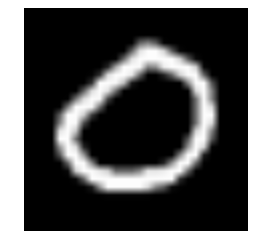

In [6]:
# Visualizing Training Dataset
%matplotlib inline
i = random.randrange(0, 42000)
img = np.asarray(train.ix[i, 1:])
img = img.reshape(28, 28)
pylab.imshow(img)
pylab.gray(); pylab.axis('off')
pylab.show()

#print "-----------------------------"
#print train.head(5)
#print "-----------------------------"
#print train.count()

In [7]:
# Preprocessing step
# Normalizing image
train_labels = train.ix[:, 0].values.astype(np.int32)
train_images = train.ix[:, 1:].values.astype(np.float32)
train_images /= train_images.std(axis = None)
train_images -= train_images.mean()

test_images = test.values.astype(np.float32)
test_images /= test_images.std(axis = None)
test_images -= test_images.mean()

In [8]:
# Setting architecture of NN
net = NeuralNet(
        layers = [
            ('input', layers.InputLayer),
            ('conv1', layers.Conv2DLayer),
            ('pool1', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('conv2', layers.Conv2DLayer),
            ('pool2', layers.MaxPool2DLayer),
            ('dropout2', layers.DropoutLayer),
            ('hidden3', layers.DenseLayer),
            ('output', layers.DenseLayer),
        ],
    
        input_shape = (None, 1, 28, 28),
        conv1_num_filters = 5, conv1_filter_size = (5, 5),
        pool1_pool_size = (2, 2),
        dropout1_p = 0.2,
        conv2_num_filters = 5, conv2_filter_size = (5, 5),
        pool2_pool_size = (2, 2),
        hidden3_num_units = 32,
        output_num_units = 10, output_nonlinearity = softmax,
    
        batch_iterator_train = BatchIterator(batch_size = 150),
        batch_iterator_test = BatchIterator(batch_size = 150),
    
        update = updates.adam,
    
        use_label_encoder = True,
        regression = False,
        max_epochs = 10,
        verbose = 1,
    )

In [9]:
# Reshape dataset to fit to NN
X = train_images.reshape(-1, 1, 28, 28)
y = train_labels

test_x = test_images.reshape(-1, 1, 28, 28)

In [10]:
# Train NN
net.fit(X, y);

# Neural Network with 3682 learnable parameters

## Layer information

  #  name      size
---  --------  -------
  0  input     1x28x28
  1  conv1     5x24x24
  2  pool1     5x12x12
  3  dropout1  5x12x12
  4  conv2     5x8x8
  5  pool2     5x4x4
  6  dropout2  5x4x4
  7  hidden3   32
  8  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       1.60469       0.58678      2.73474      0.83146  17.94s
      2       0.74371       0.32932      2.25830      0.90784  17.88s
      3       0.59294       0.25892      2.29003      0.92655  17.72s
      4       0.51195       0.22640      2.26124      0.93708  17.44s
      5       0.46675       0.19256      2.42393      0.94632  19.08s
      6       0.43818       0.17885      2.45006      0.94468  20.33s
      7       0.41042       0.16523      2.48396      0.95076  18.86s
      8       0.39638       0.16059      2.46832      0.95310  17.5

/home/faizy/src/lasagne/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


In [ ]:
# Saving model
with open('/home/faizy/model.pkl', 'wb') as f:
    pkl.dump(net, f)
    
f.close()

In [ ]:
# Output prediction
with open('/home/faizy/model.pkl', 'rb') as f:
    net = pkl.load(f)

f.close()

In [11]:
pred = net.predict(test_x)

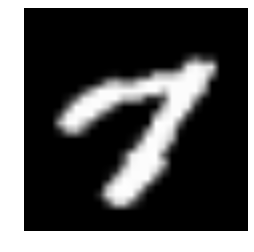

--------------
PREDICTION:  7


In [17]:
# Visualizing output
%matplotlib inline
i = random.randrange(0, 28000)
img = np.asarray(test.ix[i])
img = img.reshape(28, 28)
pylab.imshow(img)
pylab.gray(); pylab.axis('off')
pylab.show()
print '--------------'
print 'PREDICTION: ', pred[i]

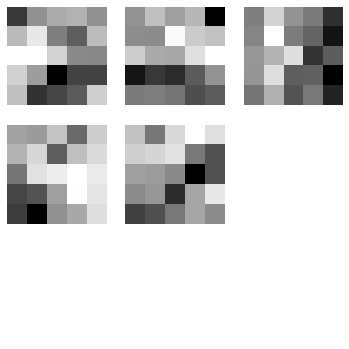

In [18]:
visualize.plot_conv_weights(net.layers_['conv1'])

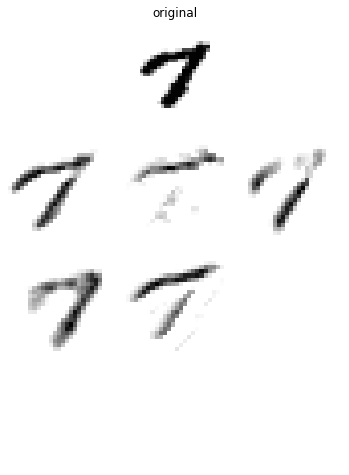

In [19]:
visualize.plot_conv_activity(net.layers_['conv1'], test_x[i:i+1, :, :, :])

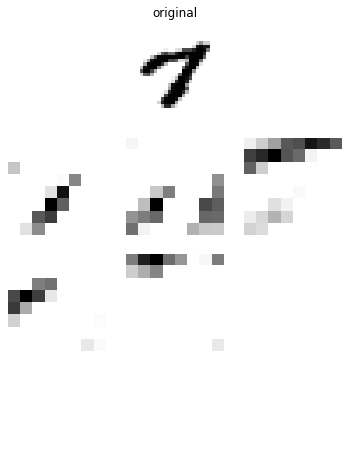

In [20]:
visualize.plot_conv_activity(net.layers_['conv2'], test_x[i:i+1, :, :, :])